# Multiple News Phase diagrams

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import copy
import matplotlib.pyplot as plt

In [2]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.path.abspath(''))))

In [3]:
from classes.agent import AgentState
from classes.news import News
from classes.utils import construct_world

In [4]:
def create_news(sensations, decay_parameters):
    news = {}
    for name, (s, c) in enumerate(zip(sensations, decay_parameters)):
        news[name] = News(name, sensation=s, decay_parameter=c)
        
    return news

In [5]:
def create_sensation_map(sensations_1, sensations_2, num_agents=1000, num_samples=10, initial_per_news=5):
    agent_names = list(range(num_agents))
    thresholds = np.random.random(num_agents)
    independences = (1/100)*np.random.random(num_agents)
    
    df = pd.DataFrame(columns=['sensation news 1', 'sensation news 2', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')  
    for s_1 in sensations_1:
        for s_2 in sensations_2:
            samples = []
            for _ in range(num_samples):
                news = create_news([s_1, s_2], [0.0, 0.0])
                world = construct_world(agent_names, thresholds, independences, news)

                initial_agent_names = np.random.choice(agent_names, len(news.keys()) * initial_per_news, replace=False)
                for news_idx, name_news in enumerate(news.keys()):
                    for i in range(initial_per_news):
                        world.agents[initial_agent_names[news_idx*initial_per_news + i]].states[name_news] = AgentState.ACTIVE
                
                number_active, _, _ = world.full_dynamics()
                samples.append((number_active[0] - number_active[1]))
            
            df_active = pd.DataFrame([[s_1, s_2, np.mean(samples) / num_agents]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
    return df.astype(float).pivot('sensation news 2', 'sensation news 1', 'number active')

In [6]:
sensation_1 = np.linspace(0.0, 0.9, 10)
sensation_2 = np.linspace(0.0, 0.9, 10)

sensation_map = create_sensation_map(sensation_1, sensation_2)

Starting simulation with 1000 agents (this may take some time...)
Simulation completed!!!


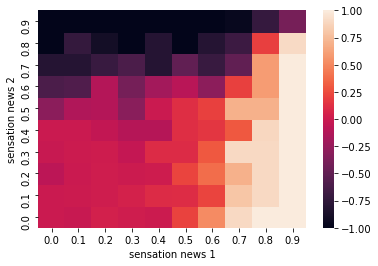

In [7]:
ax = sns.heatmap(sensation_map,xticklabels=np.float32(np.linspace(0, 0.9, 10)), yticklabels=np.float32(np.linspace(0, 0.9, 10)), vmin=-1.0, vmax=1.0)
ax.invert_yaxis()

In [8]:
def select_best_agents_by_degree(graph, num_agents):
    best_agents_by_degree = []
    for _ in range(num_agents):
        best_agent = None
        best_degree = -1
        for a in graph.nodes():
            if a in best_agents_by_degree:
                pass
            else:
                out_degree_a = graph.out_degree(a)
                if out_degree_a > best_degree:
                    best_degree = out_degree_a
                    best_agent = a
        best_agents_by_degree.append(best_agent)
    
    return best_agents_by_degree

In [9]:
def create_sensation_map_non_random_initial_activations(sensations_1, sensations_2, num_agents=1000, num_samples=10, initial_per_news_1=5, initial_per_news_2 =5):
    agent_names = list(range(num_agents))
    thresholds = np.random.random(num_agents)
    independences = (1/100)*np.random.random(num_agents)
    
    df = pd.DataFrame(columns=['sensation news 1', 'sensation news 2', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')  
    for s_1 in sensations_1:
        for s_2 in sensations_2:
            samples = []
            for _ in range(num_samples):
                news = create_news([s_1, s_2], [0.0, 0.0])
                world = construct_world(agent_names, thresholds, independences, news)
                
                initial_active_agent_news_1 = np.array(select_best_agents_by_degree(graph=world.graph, num_agents=initial_per_news_1))
                
                for a_name in initial_active_agent_news_1:
                    world.agents[a_name].states[news[0].name] = AgentState.ACTIVE   
                
                agent_names_without_active_agents_news_1 = copy.deepcopy(agent_names)
                for ag_name in initial_active_agent_news_1:
                    agent_names_without_active_agents_news_1.remove(ag_name)
                
                initial_active_agent_news_2 = np.random.choice(agent_names_without_active_agents_news_1, initial_per_news_2, replace=False)
                
                for a_name in initial_active_agent_news_2:
                    world.agents[a_name].states[news[1].name] = AgentState.ACTIVE 
                    
                number_active, _, _ = world.full_dynamics()
                samples.append((number_active[0] - number_active[1]))
            
            df_active = pd.DataFrame([[s_1, s_2, np.mean(samples) / num_agents]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
    return df.astype(float).pivot('sensation news 2', 'sensation news 1', 'number active')

In [10]:
sensation_1 = np.linspace(0.0, 0.9, 10)
sensation_2 = np.linspace(0.0, 0.9, 10)

In [11]:
initial_active_agents_per_news_2 = [5,50,200,500]

Initial nodes active for news 2 5
Starting simulation with 1000 agents (this may take some time...)
Simulation completed!!!


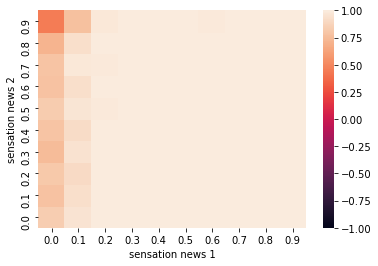

Initial nodes active for news 2 50
Starting simulation with 1000 agents (this may take some time...)
Simulation completed!!!


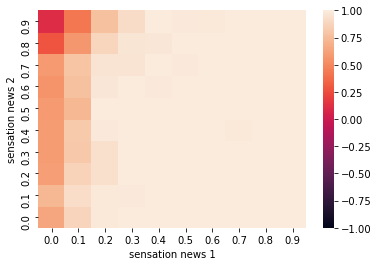

Initial nodes active for news 2 200
Starting simulation with 1000 agents (this may take some time...)
Simulation completed!!!


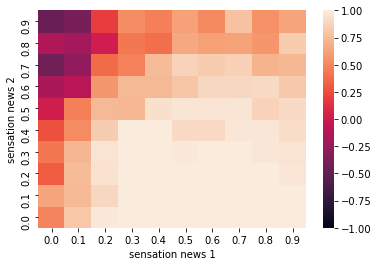

Initial nodes active for news 2 500
Starting simulation with 1000 agents (this may take some time...)
Simulation completed!!!


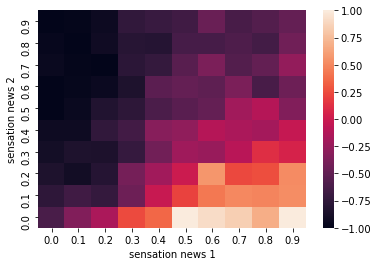

In [12]:
for init_act_n2 in initial_active_agents_per_news_2:
    print('Initial nodes active for news 2', init_act_n2)
    sensation_map = create_sensation_map_non_random_initial_activations(sensation_1, sensation_2, initial_per_news_1=5, initial_per_news_2 =init_act_n2)
    ax = sns.heatmap(sensation_map,xticklabels=np.float32(np.linspace(0, 0.9, 10)), yticklabels=np.float32(np.linspace(0, 0.9, 10)), vmin=-1.0, vmax=1.0)
    ax.invert_yaxis()
    plt.show()